<a href="https://colab.research.google.com/github/ferreirabruno7/machine_learning/blob/master/Hacker_de_Fiscaliza%C3%A7%C3%A3o_e_An%C3%A1lise_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diagnóstico da remuneração líquida dos servidores públicos federais**
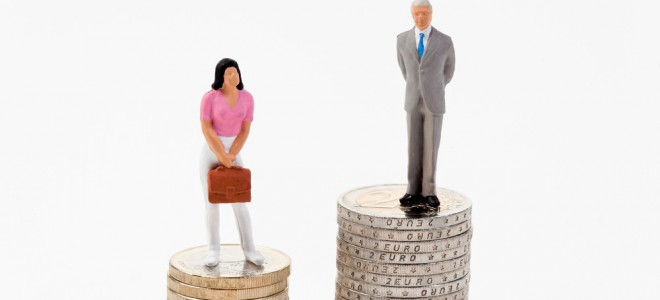
#Mulheres ganham em média **11,11% menos que homens** no poder executivo federal.  
---

#As servidoras ativas do poder executivo federal ganham em média cerca de **11% menos** do que os servidores do sexo masculino. 

---
#A diferença salarial é ainda mais acentuada quando comparada a dimensão racial: 
#servidores e servidoras negros ganham em média **27% menos** que servidores e servidores brancos.

---
#Quando analisadas as dimensões raciais e gênero a diferença é ainda maior: servidoras negras ganham em média **24% menos** que servidoras brancas e servidores negros ganham em média **29% menos** que servidores brancos. 


---
#O levantamento mostra o nível de desigualdade racial e de gênero no rendimento dos servidores ativos do governo federal. 



---


Fonte de dados: https://www.ipea.gov.br/atlasestado/consulta/145


In [19]:
#importação das bibliotecas base
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")

In [3]:
#acessar google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [4]:
#importar arquivo csv, geração do dataframe e obtenção de informações dos dados
salarios = pd.read_csv("/content/drive/My Drive/Colab Notebooks/valor_salario_sexo_raca.csv", delimiter = ';', encoding='iso-8859-1', decimal=',')
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88 entries, 0 to 87
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         88 non-null     int64  
 1   ano        88 non-null     int64  
 2   sexo_raca  88 non-null     object 
 3   liquido    88 non-null     float64
dtypes: float64(1), int64(2), object(1)
memory usage: 2.9+ KB


In [5]:
#visualização de parte dos registros do arquivo csv
salarios.head()

,id,ano,sexo_raca,liquido
0,1,1999,Homem Branco,6527.2
1,2,1999,Homem Negro,4768.7
2,3,1999,Mulher Branca,5261.6
3,4,1999,Mulher Negra,4010.0
4,5,2000,Homem Branco,5690.3


In [6]:
#criação de novo dataframe pivotando a coluna sexo_raça
pivot_salarios = salarios.pivot(values = 'liquido', index = 'ano', columns = 'sexo_raca')
pivot_salarios

sexo_raca,Homem Branco,Homem Negro,Mulher Branca,Mulher Negra
ano,,,,
1999,6527.2,4768.7,5261.6,4010.0
2000,5690.3,4151.7,4887.3,3782.5
2001,5833.8,4107.2,4997.5,3734.5
2002,6407.0,4489.6,5429.7,4069.7
2003,6133.3,4297.4,5171.9,3856.7
2004,5902.9,4372.2,4963.7,3862.0
2005,6314.4,4558.0,5298.2,4036.4
2006,6227.3,4368.9,5269.9,3958.6
2007,7049.0,4815.0,5822.3,4311.5


In [7]:
#resetando o índice do novo dataframecriado para utilização do campo ano como coluna
df = pivot_salarios.reset_index()


In [8]:
#inspecionar novo dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ano            22 non-null     int64  
 1   Homem Branco   22 non-null     float64
 2   Homem Negro    22 non-null     float64
 3   Mulher Branca  22 non-null     float64
 4   Mulher Negra   22 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1008.0 bytes


In [9]:
#visualização de parte dos registros do arquivo csv

df.head()

sexo_raca,ano,Homem Branco,Homem Negro,Mulher Branca,Mulher Negra
0,1999,6527.2,4768.7,5261.6,4010.0
1,2000,5690.3,4151.7,4887.3,3782.5
2,2001,5833.8,4107.2,4997.5,3734.5
3,2002,6407.0,4489.6,5429.7,4069.7
4,2003,6133.3,4297.4,5171.9,3856.7


In [10]:
#criação de colunas adcionar com os totais de salários desagregado por sexo
df['salarios_homens'] = df['Homem Branco'] + df['Homem Negro']
df['salarios_mulheres'] = df['Mulher Branca'] + df['Mulher Negra']

In [11]:
#criação de colunas adcionar com os totais de salários desagregado por segmentação racial

df['salarios_negro'] = df['Mulher Negra'] + df['Homem Negro']
df['salarios_brancos'] = df['Mulher Branca'] + df['Homem Branco']


In [12]:
#cálculo da diferença salarial entre os extratos analisado:

#1-diferença salarial entre brancos e negros
df['diferenca_branco_negros'] = df['salarios_brancos'] - df['salarios_negro']

#2-diferença salarial entre mulheres brancas e mulheres negras
df['diferenca_mulheres_branca_negra'] = df['Mulher Branca'] - df['Mulher Negra']

#3-diferença salarial entre homens brancos e homens negros
df['diferenca_homens_branco_negro'] = df['Homem Branco'] - df['Homem Negro']

#4-diferença salarial entre homens  e mulheres independente de raça
df['diferenca_homens_mulheres'] = df['salarios_homens'] - df['salarios_mulheres']

In [13]:
#cálculo da diferença percentual salarial entre os extratos analisado:

#1-diferença percentual salarial entre brancos e negros
df['percentual_diferenca_homens_branco_negro']  = (df['diferenca_homens_branco_negro']*100)/df['Homem Branco']

#2-diferença percentual salarial entre mulheres brancas e mulheres negras
df['percentual_diferenca_mulheres_branca_negra']  = (df['diferenca_mulheres_branca_negra']*100)/df['Mulher Branca']

#3-diferença percentual salarial entre homens brancos e homens negros
df['percentual_diferenca_brancos_negros']  = (df['diferenca_branco_negros']*100)/df['salarios_brancos']

#4-diferença percentual salarial entre homens  e mulheres independente de raça
df['percentual_diferenca_homens_mulheres']  = (df['diferenca_homens_mulheres']*100)/df['salarios_homens']


In [14]:
#média total da diferença percentual salarial entre homens  e mulheres independente de raça

df['percentual_diferenca_homens_mulheres'].mean()


11.111403998847578

In [15]:
#média total da diferença percentual salarial entre mulheres brancas e mulheres negras

df['percentual_diferenca_mulheres_branca_negra'].mean()


24.580371496730002

In [16]:

#média total da diferença percentual salarial entre homens brancos e homens negros
df['percentual_diferenca_homens_branco_negro'].mean()


29.36335282353782

In [17]:
#média total da diferença percentual salarial entre brancos e negros
df['percentual_diferenca_brancos_negros'].mean()

27.143775411927002

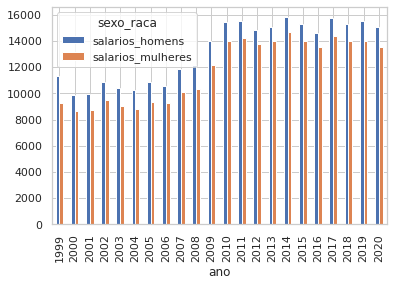

In [30]:
#geração de gráfico com o comparativo de salários entre homens e mulheres
df.plot(x="ano", y=["salarios_homens", "salarios_mulheres"], kind="bar")


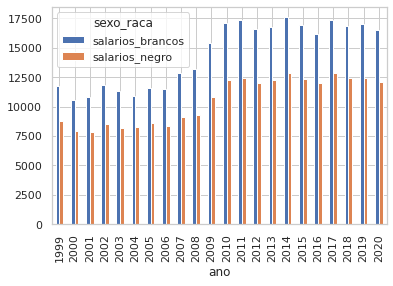

In [32]:
#geração de gráfico com o comparativo de salários entre negros e brancos
df.plot(x="ano", y=["salarios_brancos", "salarios_negro"], kind="bar")


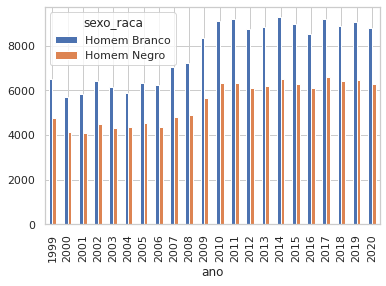

In [33]:
#geração de gráfico com o comparativo de salários entre homem negro e homem branco
df.plot(x="ano", y=["Homem Branco", "Homem Negro"], kind="bar")


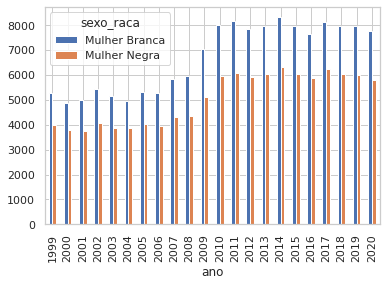

In [34]:
#geração de gráfico com o comparativo de salários entre mulher negra e mulher branca
df.plot(x="ano", y=["Mulher Branca", "Mulher Negra"], kind="bar")
